## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Getting Started

To begin, we need to import the necessary libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We will need `pandas` for data manipulation, `matplotlib` for plot customization, `seaborn` for plotting, and `numpy` for some additional calculations.


# Load the data

For this example, we will use DESeq2 results from a differential expression analysis. 
Briefly, this dataset compares knockout and wildtype samples for a specific gene in rats (_Rattus norvegicus_). The study aims to find the role of the knocked out gene in rat development.

The results compare 5 replicates each of WT and KO samples.

In [3]:
filepath = 'DESeq2results-KOvsWT.tsv'
deseq = pd.read_csv(filepath, sep='\t')

First, we examine the data structure and contents.

In [4]:
deseq.head()

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,KO.1,WT.1,KO.2,WT.2,KO.3,WT.3,KO.4,WT.4,KO.5,WT.5,external_gene_name,gene_biotype,description
0,ENSRNOG00000037919,6952.475728,-2.343605,0.088174,-26.579187,1.181477e-155,1.922854e-151,2696.887991,11195.129292,2336.830978,10734.956976,2134.972578,12024.073700,2051.509072,10584.363782,2223.502095,13542.530813,ENSRNOG00000037919,protein_coding,NaN
1,ENSRNOG00000001184,305.779107,3.612207,0.157760,22.896820,4.997783e-116,4.066946e-112,669.184555,41.007800,533.823820,36.277561,503.359284,51.908451,644.242299,39.978711,475.882437,62.126154,Pknox1,protein_coding,PBX/knotted 1 homeobox 1 [Source:RGD Symbol;Ac...
2,ENSRNOG00000009705,1348.738194,1.756749,0.081295,21.609479,1.462887e-103,7.936164e-100,2315.102825,620.975251,2162.822108,639.125259,1874.684176,621.863249,1787.772381,581.357092,2266.300944,617.378654,Lck,protein_coding,"LCK proto-oncogene, Src family tyrosine kinase..."
3,ENSRNOG00000009713,431.315577,2.316639,0.122126,18.969304,3.059300e-80,1.244753e-76,659.639925,145.480051,794.345574,113.100630,751.494143,156.763523,583.844584,136.593930,802.987924,168.905481,Oxa1l,protein_coding,"OXA1L, mitochondrial inner membrane protein [S..."
4,ENSRNOG00000009837,2594.133564,0.811993,0.044927,18.073766,5.129044e-73,1.669504e-69,3374.556660,1755.524374,3204.909124,1814.945017,3394.889982,1913.345521,3335.967157,1938.134602,3219.084839,1989.978365,Tmem131l,protein_coding,transmembrane 131 like [Source:RGD Symbol;Acc:...


The data contains the following columns (standard  DESeq2 output):

- `Gene`: gene name
- `baseMean`: average of normalized counts
- `log2FoldChange`: log2 fold change
- `lfcSE`: standard error of log2 fold change
- `stat`: Wald statistic
- `pvalue`: p-value
- `padj`: adjusted p-value

plus, additional columns:

- `KO.1` to `KO.5` and `WT.1` to`WT.5`: normalized counts for each sample (5xWT, 5xKO)
- `external_gene_name` : gene name
- `gene_biotype`: gene biotype
- `description`: gene description


We will also exampine data columns information.


In [5]:
deseq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17650 entries, 0 to 17649
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gene                17650 non-null  object 
 1   baseMean            17650 non-null  float64
 2   log2FoldChange      17650 non-null  float64
 3   lfcSE               17650 non-null  float64
 4   stat                17650 non-null  float64
 5   pvalue              17644 non-null  float64
 6   padj                16275 non-null  float64
 7   KO.1                17650 non-null  float64
 8   WT.1                17650 non-null  float64
 9   KO.2                17650 non-null  float64
 10  WT.2                17650 non-null  float64
 11  KO.3                17650 non-null  float64
 12  WT.3                17650 non-null  float64
 13  KO.4                17650 non-null  float64
 14  WT.4                17650 non-null  float64
 15  KO.5                17650 non-null  float64
 16  WT.5

# Basic plotting

## Create a volcano plot

A volcano plot is a scatter plot that shows the relationship between fold change and statistical significance.
To plot, we use fold change as x-axis, and adjusted p-value as y. We will also use some `plt` functions to change the axis labels.

Text(0, 0.5, 'Adjusted p-value')

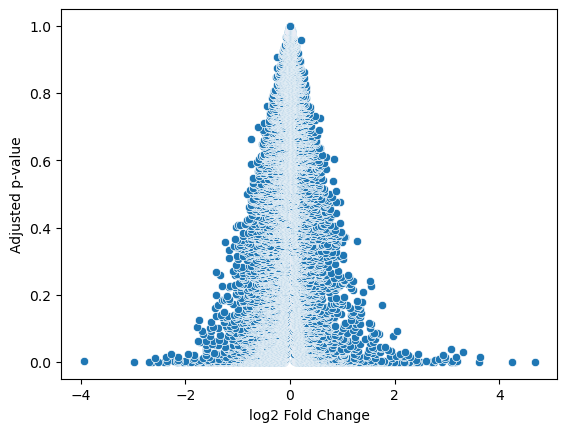

In [6]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='padj')
plt.xlabel('log2 Fold Change')
plt.ylabel('Adjusted p-value')

This plot may look different from what you have seen before. The genes that we typically care about (i.e, significant) are smooshed into  the narrrow slice range of y-axis (0 to 0.05), whereas the nonsignificant ones (that we don't care about) occupy most of the plot. Therefore, most volcano plots are shown using transformed p-values (`-log10(p-value)`) so that we can expand the region that we care. Let's add that column (`-log10(p-value)`). We will use numpy (`np`) for that transformation.

In [7]:
deseq['negLog10.padj'] = -np.log10(deseq['padj'])

Now we can redo the scatterplot (aka. volcano plot) with -log10(p-value) for y and fold change for x. Now, values farther from the x-axis (*i.e.*, higher `-log10(p-value)`) will be more significant (*i.e.*, have a smaller actual p-value).

Text(0, 0.5, '-log10 Adjusted p-value')

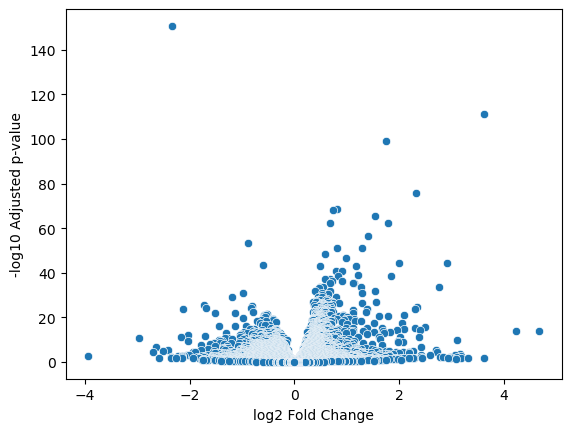

In [9]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

This looks like a typical volcano plot.
It is easier to see genes that are significant (adj.pvalue < 0.05 ~ -log10(p-value) > 1.3) along with their log2 fold change.  

Next, we will color them based on upregulated or downregulated genes. For this, we will create filters and apply them to create a column that can be used for `hue` in the `scatterplot`.

In [10]:
upFilter = (deseq['log2FoldChange'] > 1.5) & (deseq['padj'] <= 0.05)
downFilter = (deseq['log2FoldChange'] < -1.5) & (deseq['padj'] <= 0.05)

We can use this information to create a new column `regulation` which gets assigned values based on the filters. We will initialize the column so that every value is 'NS' (or "Not Significant"). Then, we will use our filters to edit those rows where `upFilter` is `True` or `downFilter` is `True`.

In [13]:
deseq['regulation'] = 'NS'
deseq.loc[upFilter, 'regulation'] = 'up-regulated'
deseq.loc[downFilter, 'regulation'] = 'down-regulated'

We can use this new column to assign `hue` colors in the `scatterplot`.

Text(0, 0.5, '-log10 Adjusted p-value')

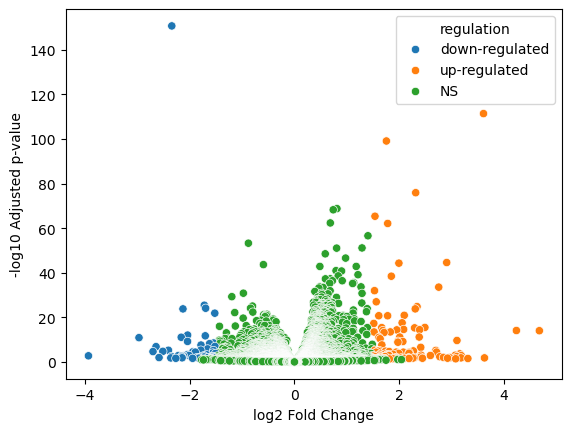

In [14]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

By convention, overexpressed genes are typically colored red, and underexpressed genes are colored green. The genes that are not significantly differentially expressed are colored grey (note: this convention has been used since microarray days). 

Let's redo the plot with a different color palette.

Text(0, 0.5, '-log10 Adjusted p-value')

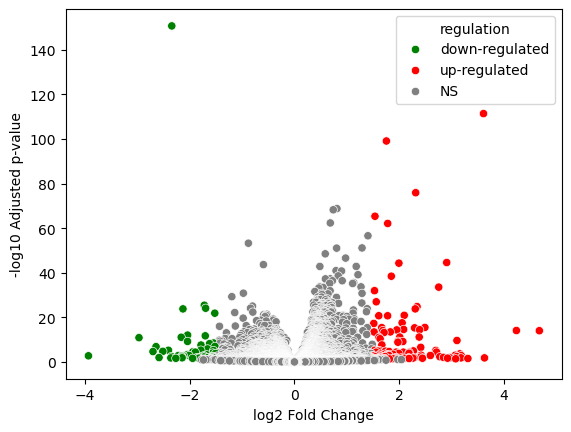

In [15]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

We can also draw lines separating the borders using the `axhline` and `axvline` functions. (These are similar to the `R` `geom_hline()` and `geom_vline()`.

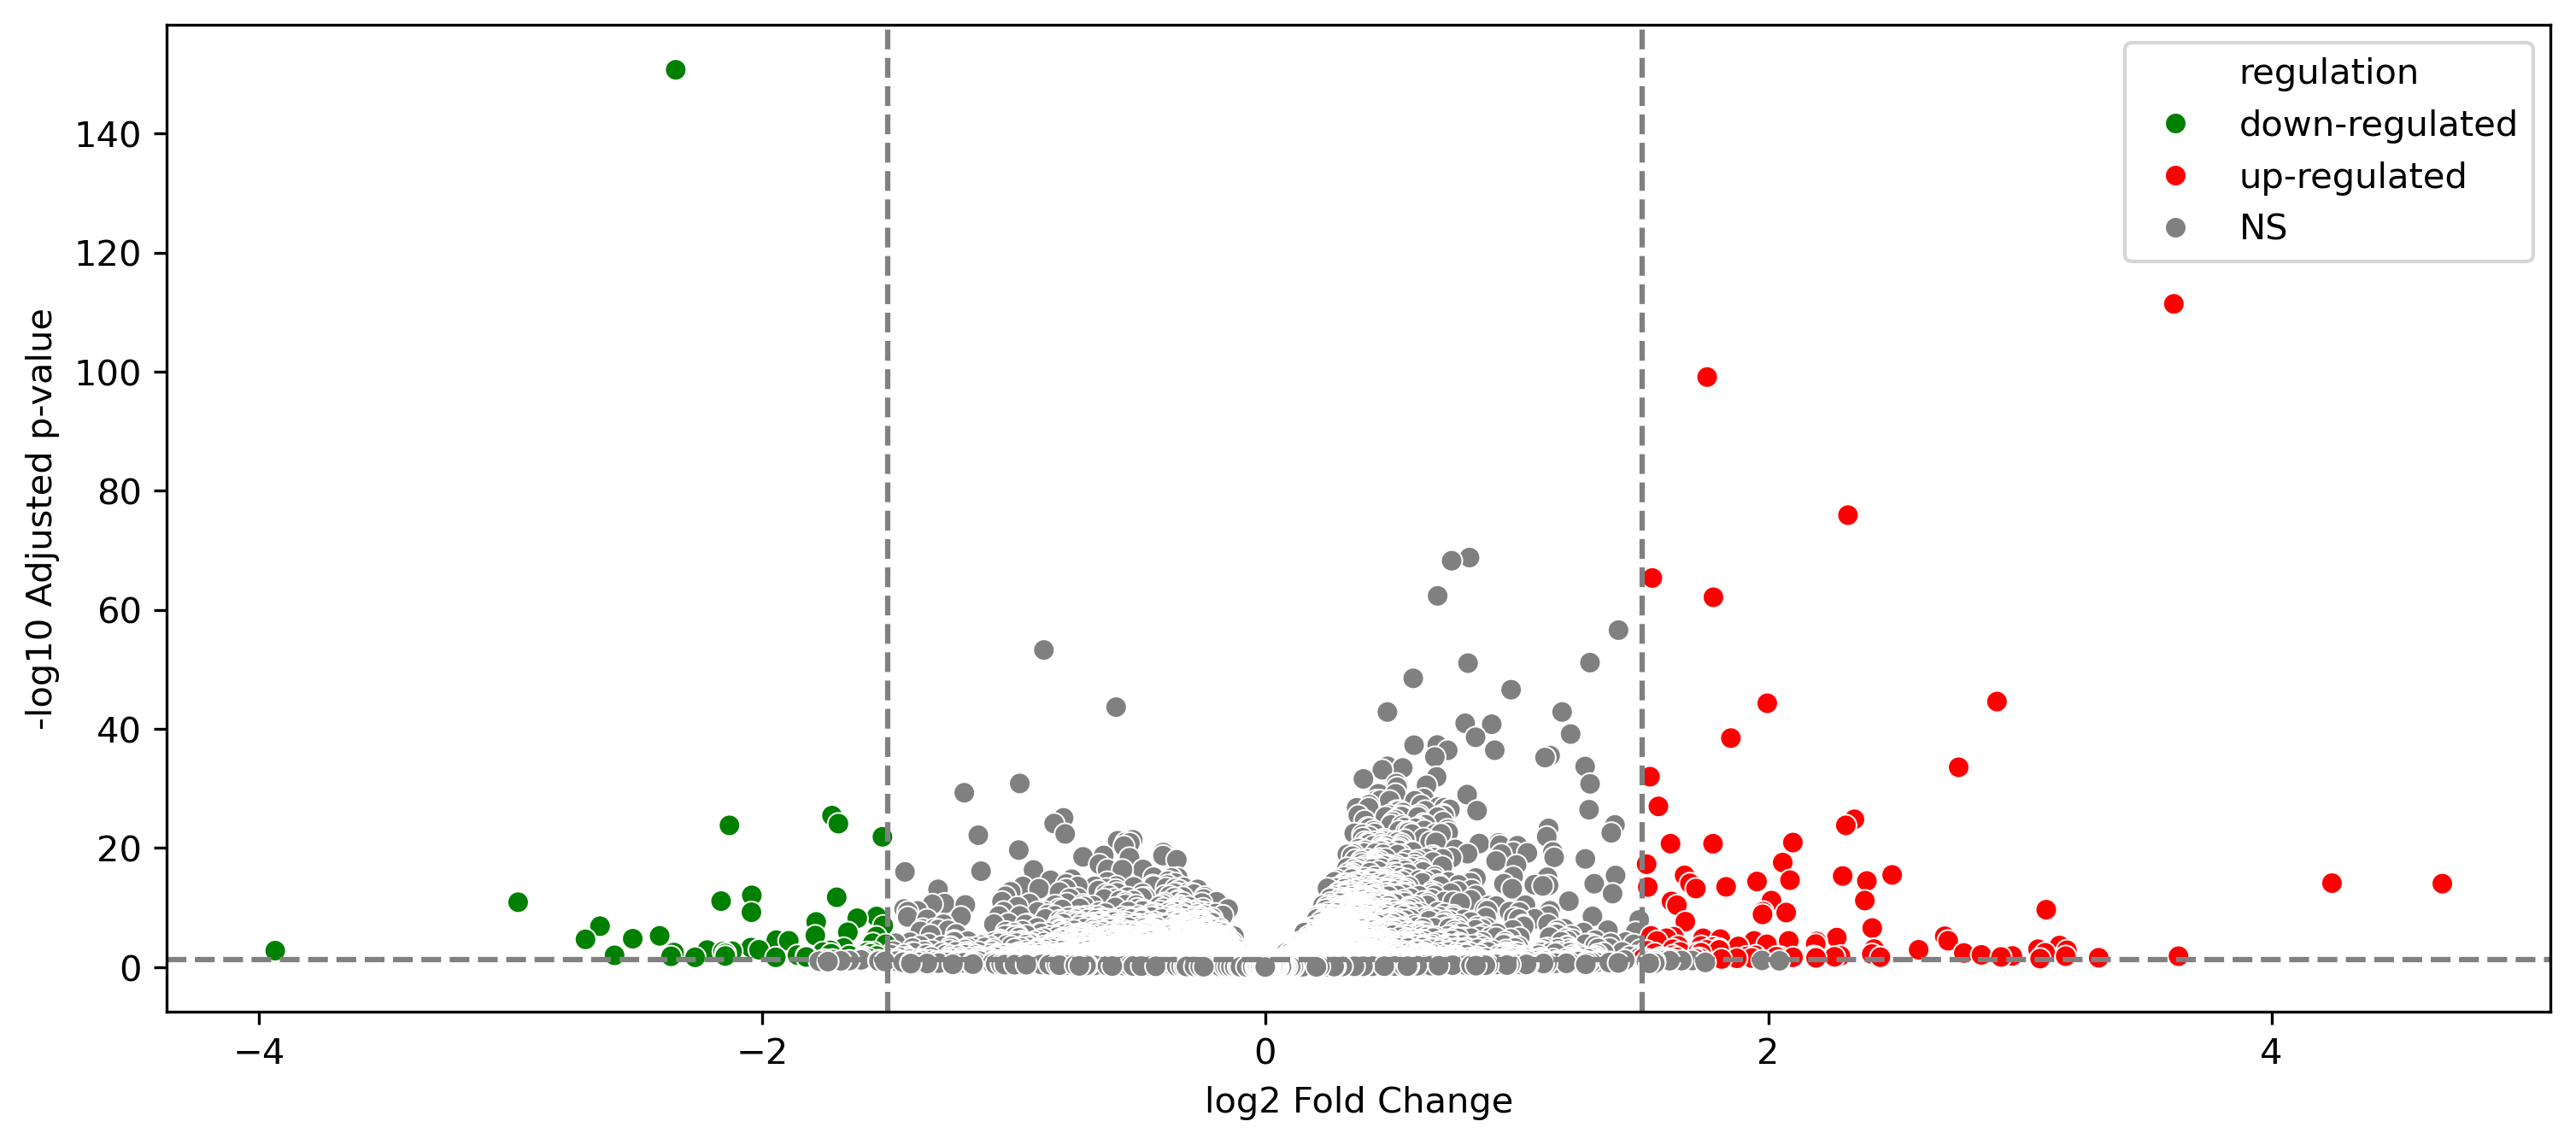

In [26]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")

We can move the legend outside the plot if it is in the way or more aestheically appropriate. Here we will use the `bbox_to_anchor` argument in the `legend` function.

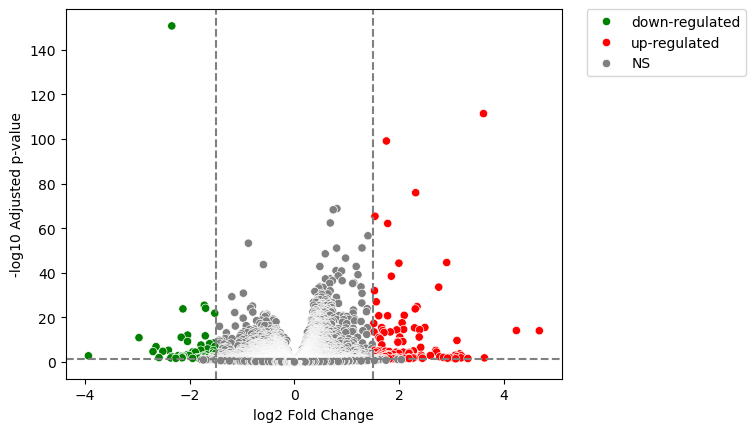

In [23]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')
plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
# set an anchor to 105% of x-axis and 100% y-axis, specify location of box relative to anchor, and remove additional padding
# loc=2 means that the upper-left of the box touches the anchor

You might also want to label the points with gene names. You can use the `text` function to do this.
For this, we will create another column with gene names and use it to label the points.
We will only use top 5 significant genes for this example (using them all would be too much!).

In [33]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

These commands kept 10 rows from the deseq dataframe that had the largest log2foldchange and the smallest. Even though we kept the top 10, we can use any number of these to label our plot. (Keeping extra means we can change our minds later!) Now, we can use the `text` function to label the points.

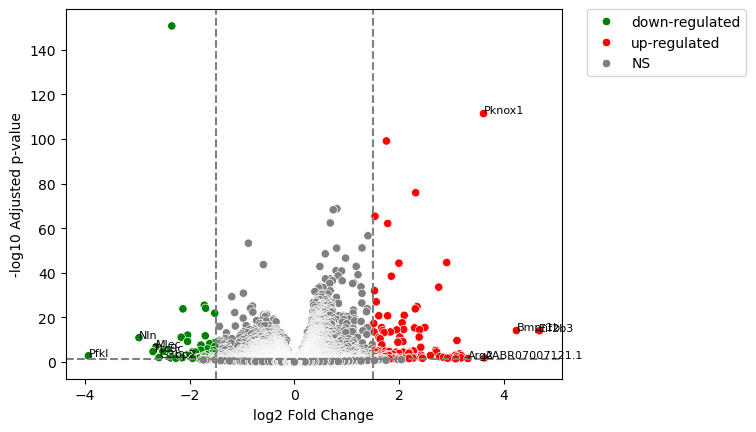

In [37]:
sns.scatterplot(data= deseq, x='log2FoldChange', y='negLog10.padj', hue='regulation', palette=['green','red', 'grey'])

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted p-value')

plt.axvline(-1.5,color="grey",linestyle="--")
plt.axvline(1.5,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for i in range(5): # range(5) counts [0, 1, 2, 3, 4]
    plt.text(topUp['log2FoldChange'].iloc[i], topUp['negLog10.padj'].iloc[i], topUp['external_gene_name'].iloc[i], fontsize=8)
    plt.text(topDown['log2FoldChange'].iloc[i], topDown['negLog10.padj'].iloc[i], topDown['external_gene_name'].iloc[i], fontsize=8)
    # these plot text functions are specified as `plt.txt(x,y,"text")
    #   here the x-coordinate is from topDown['log2FoldChange'].iloc[i]
    #        the y-coordinate is from topDown['negLog10.padj'].iloc[i] 
    #        the value of the text is from topDown['external_gene_name'].iloc[i]

We can customize the plot with many additional options available through seaborn, but we will stop here and save the plot.

In [38]:
plt.savefig('volcano_plot.png')

<Figure size 640x480 with 0 Axes>

## Create a heatmap

Heatmaps are a great way to visualize the expression of genes across samples. For this example, we will use the normalized counts for the top 10 differentially expressed genes from the above table. We will use the same filters we created earlier.

In [31]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

We can merge these two dataframes using `pd.concat`, which adds rows or columns to the dataframe using `pd.concat([df1, df2])` or `pd.concat([df1, df2], axis=1)`, respectively.

In [73]:
heatmapData = pd.concat([topUp, topDown])
heatmapData.shape

(20, 22)

In [74]:
# 22 is a lot of columns; let's see what they are
heatmapData.columns

Index(['Gene', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'KO.1', 'WT.1', 'KO.2', 'WT.2', 'KO.3', 'WT.3', 'KO.4', 'WT.4', 'KO.5',
       'WT.5', 'external_gene_name', 'gene_biotype', 'description',
       'negLog10.padj', 'regulation'],
      dtype='object')

We don't need all 22 columns for this heatmap. Let's select only those columns we need: the gene name and the values for each of the samples.

In [75]:
heatmapData = heatmapData[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]
heatmapData.head()

,external_gene_name,KO.1,KO.2,KO.3,KO.4,KO.5,WT.1,WT.2,WT.3,WT.4,WT.5
321,Eif2b3,397.692881,477.787066,125.586622,83.550173,683.762560,15.622019,12.803845,14.534366,12.493347,13.590096
316,Bmpr1b,27.573373,38.340937,45.575790,56.371201,34.646687,2.929129,1.066987,5.190845,0.832890,0.970721
4931,AABR07007121.1,8.484115,54.070553,61.780516,10.066286,0.000000,0.000000,3.200961,1.038169,0.832890,5.824327
1,Pknox1,669.184555,533.823820,503.359284,644.242299,475.882437,41.007800,36.277561,51.908451,39.978711,62.126154
5508,Arg2,5.302572,53.087452,43.550200,7.046400,0.000000,0.000000,6.401922,1.038169,1.665780,1.941442


Now we have only those rows and columns we need for the heatmap. We can check for missing data using `heatmapData.isna()` or we can automatically drop anything with missing data using `heatmapData.dropna()`. Here, we don't have missing data, so we can just move on. Let's reindex the data frame using the gene column first.

In [76]:
heatmapData = heatmapData.set_index('external_gene_name')

Now, we will use the `heatmap` function to plot the heatmap. (If we do not have a index, seaborn will not know how to plot the data. Now we know that the index, or y-axis, is the gene name). *Note: you can try skipping the index or indexing on a different column to see how it changes the output or what errors it gives*

<Axes: ylabel='external_gene_name'>

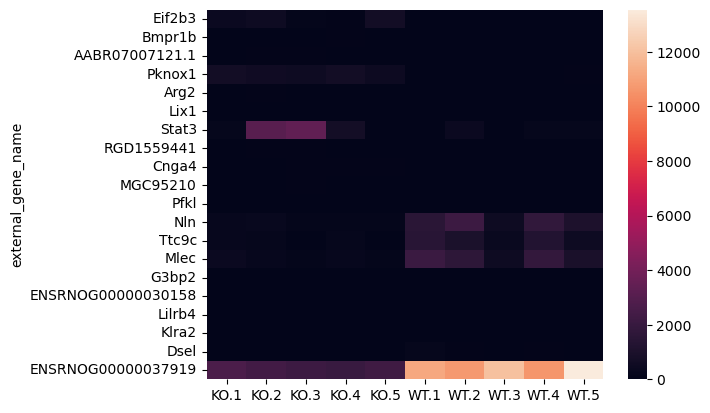

In [77]:
sns.heatmap(heatmapData)

We can customize our heatmap with different color palettes, row and column labels, etc. Blue-to=red is common for heatmaps, and we might want nicer axis labels. Since we will be adding numbers into the plot, we need to make it a bit bigger.

Text(99.7222222222222, 0.5, 'gene name')

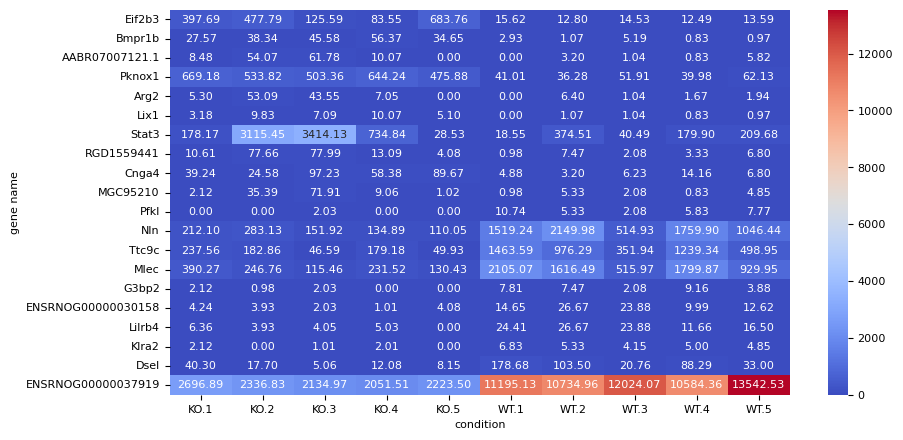

In [80]:
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams.update({'font.size': 8})

sns.heatmap(heatmapData, cmap='coolwarm', annot=True, fmt=".2f") # fmt controls the number of decimals places in the plot
plt.xlabel('condition')
plt.ylabel('gene name')

Text(99.7222222222222, 0.5, 'gene name')

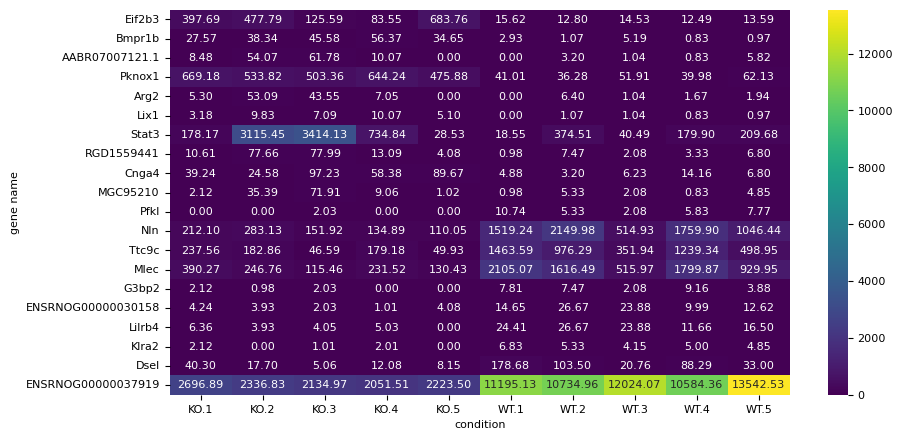

In [82]:
# 'coolwarm' is not our only option
sns.heatmap(heatmapData, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('condition')
plt.ylabel('gene name')

Instead of a simple heatmap, we might want to know the similarity amongst different samples. Here we can use `clustermap` to cluster the rows and columns, which can be useful to identify patterns in the data.

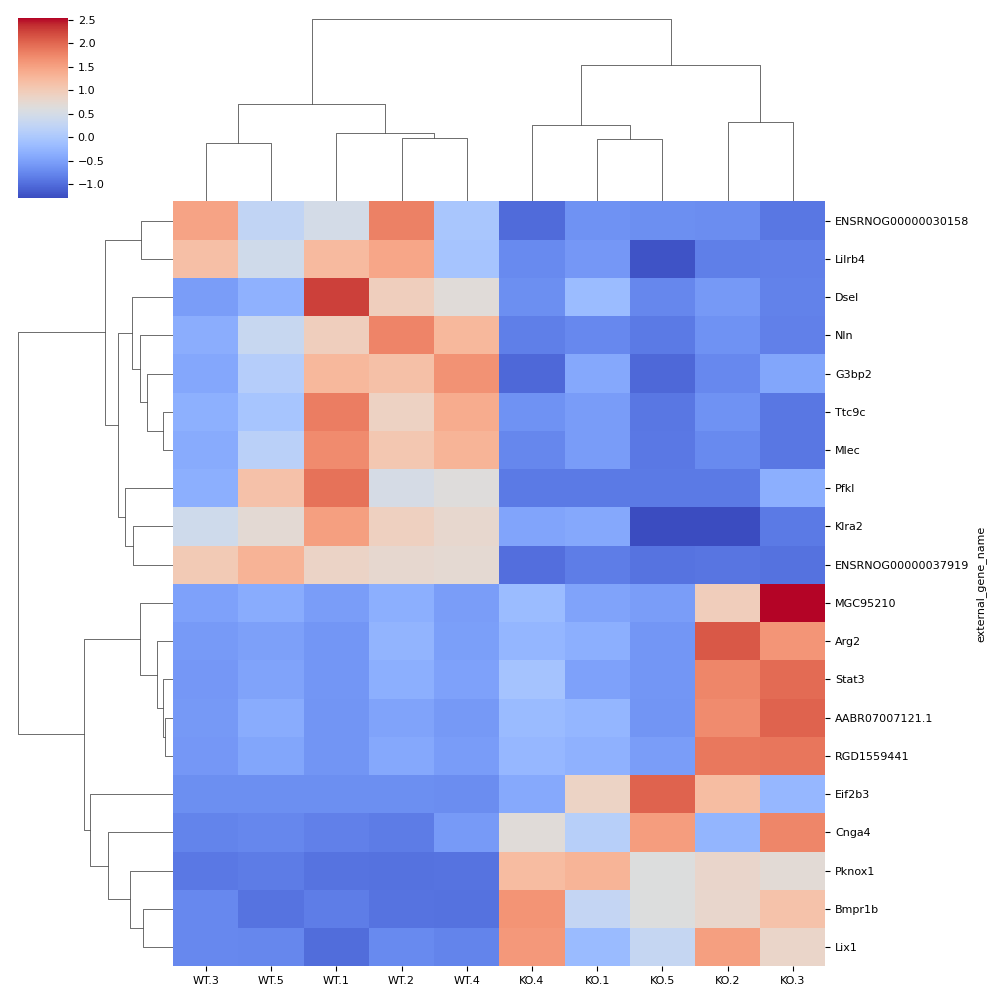

In [83]:
sns.clustermap(heatmapData, z_score=0, cmap='coolwarm')

We can also add values to our heatmap

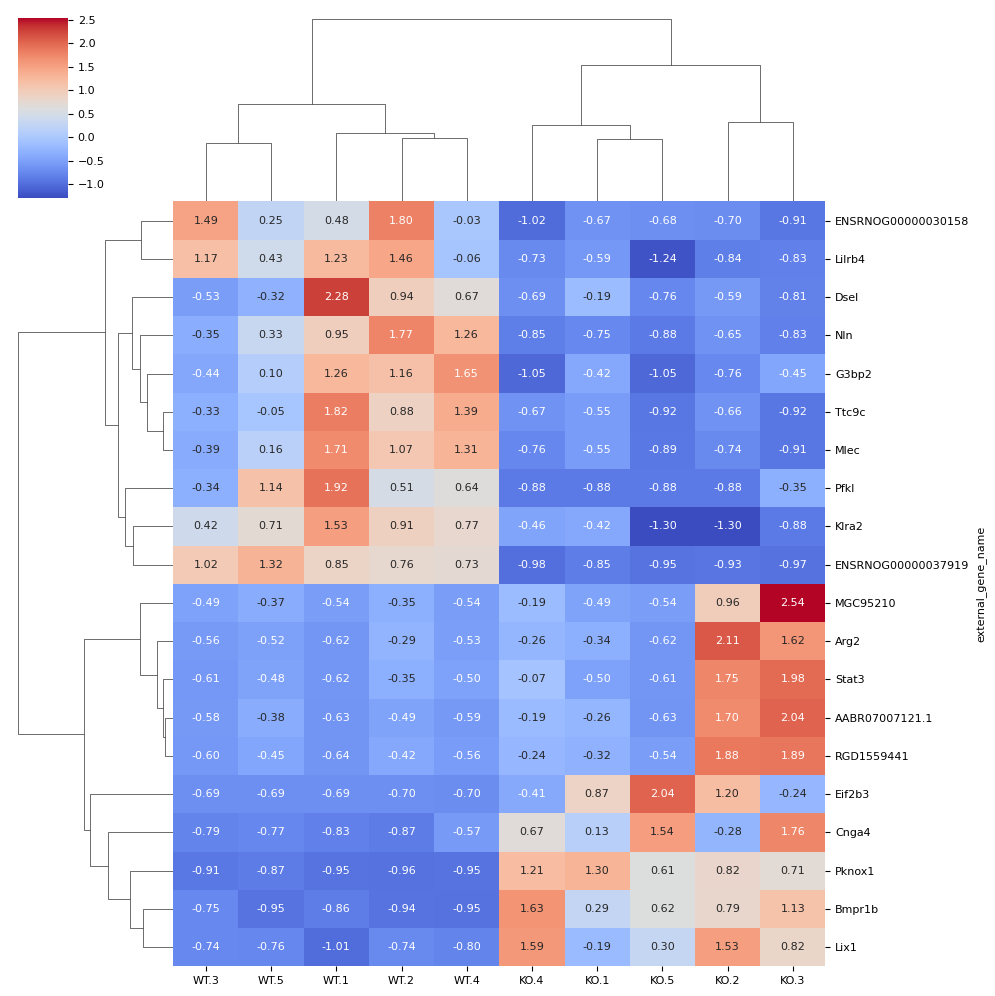

In [84]:
sns.clustermap(heatmapData, z_score=0, cmap='coolwarm', annot=True, fmt=".2f")

Let's save this plot.

In [85]:
plt.savefig('heatmap.png')

<Figure size 1000x500 with 0 Axes>

## Gene expression plots

Another common task in DGE analysis is to plot the expression of various genes across samples. This can be done using seaborn's point plot. *Note that you can also create various other plots like violin plot, box plot, etc. using seaborn, but for simplicity, we will use point plot here.* Here again we will use our topUp and topDown dataframes. Let's keep them separate, as though we are making two separate figures.

In [96]:
topUp = deseq.loc[upFilter].nlargest(10, 'log2FoldChange')
topDown = deseq.loc[downFilter].nsmallest(10, 'log2FoldChange')

Again, we only need the gene name and expression data; so we will select only those columns.

In [97]:
topUp = topUp[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]
topDown = topDown[['external_gene_name', 'KO.1', 'KO.2', 'KO.3', 'KO.4', 'KO.5', 'WT.1', 'WT.2', 'WT.3', 'WT.4', 'WT.5']]

To make this plot, we need to reshape the data to long format. Reshaping data involves transforming the layout of your DataFrame to better suit your analysis or presentation needs. You will find that long data is often required for your plotting needs (in R and in Python). Pandas provides several methods for reshaping data, including melting, pivoting, and stacking/unstacking. Here, we will use `melt`.

<img src="https://github.com/EEOB-BioData/BCB546_Spring2024/assets/4835524/5a500282-e845-4cc3-90d2-157a644980bd"
    alt="image" width="600" height="auto">

In [98]:
topUp = topUp.melt(id_vars='external_gene_name', var_name='Sample', value_name='Normalized expression')
topDown = topDown.melt(id_vars='external_gene_name', var_name='Sample', value_name='Normalized expression')
topUp.head()

,external_gene_name,Sample,Normalized expression
0,Eif2b3,KO.1,397.692881
1,Bmpr1b,KO.1,27.573373
2,AABR07007121.1,KO.1,8.484115
3,Pknox1,KO.1,669.184555
4,Arg2,KO.1,5.302572


Our samples have names based on their condition and replicate number. We can also add 'condition' column identifying which samples are from KO and WT.

In [103]:
topUp['condition'] = 'KO' # add a column where all values are KO
topDown['condition'] = 'KO'

filterU = topUp['Sample'].str.contains('WT') # create a filter that detects the string WT in the Sample column
filterD = topDown['Sample'].str.contains('WT') 

topUp.loc[filter, 'condition'] = 'WT' # use that filter to change the condition column values to WT
topDown.loc[filter, 'condition'] = 'WT'

topDown

,external_gene_name,Sample,Normalized expression,condition
0,Pfkl,KO.1,0.000000,KO
1,Nln,KO.1,212.102870,KO
2,Ttc9c,KO.1,237.555214,KO
3,Mlec,KO.1,390.269281,KO
4,G3bp2,KO.1,2.121029,KO
...,...,...,...,...
95,ENSRNOG00000030158,WT.5,12.619375,WT
96,Lilrb4,WT.5,16.502260,WT
97,Klra2,WT.5,4.853606,WT
98,Dsel,WT.5,33.004519,WT


Last time we didn't have any NA values. Let's check that here.

In [106]:
topUp.isna().sum()

external_gene_name       0
Sample                   0
Normalized expression    0
condition                0
dtype: int64

In [107]:
topDown.isna().sum()

external_gene_name       0
Sample                   0
Normalized expression    0
condition                0
dtype: int64

We can rename `external_gene_name` later in the plot, or we can redo it now so that it is done. Let's rename it simply 'Gene'.

In [109]:
topUp = topUp.rename(columns={'external_gene_name': 'Gene'})
topDown = topDown.rename(columns={'external_gene_name': 'Gene'})
topUp.columns

Index(['Gene', 'Sample', 'Normalized expression', 'condition'], dtype='object')

Much nicer. Now we have cleaned our dataset to make plotting much easier. We have a choice, though. We could plot all genes on the same plot (may be useful in certain scenarios), but often we want to see each gene individually. In this case, we need to use a FacetGrid (like a facet_wrap in R).

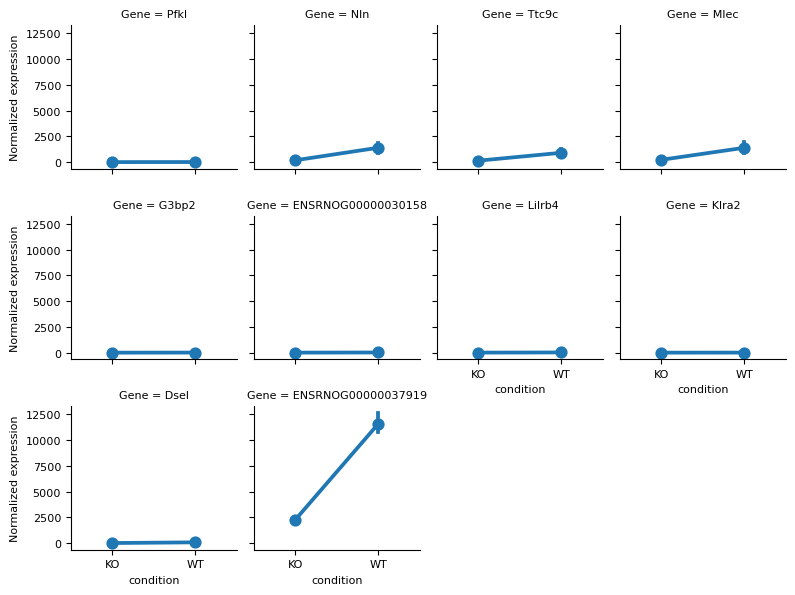

In [112]:
 # first we create the grid, specify what the facets are, and how many columns we want
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2)

# then, we map our points to the facets
g.map_dataframe(sns.pointplot, x="condition", y="Normalized expression", order=['KO', 'WT'])

Notice that this automatically makes the y-axis the same for everything -- useful in some cases, but here some of our genes are hard to visualize on such a large axis. We can also barely see the error bars on each point. Let's make the y-axis free for each plot, so that we can visualize the difference better:

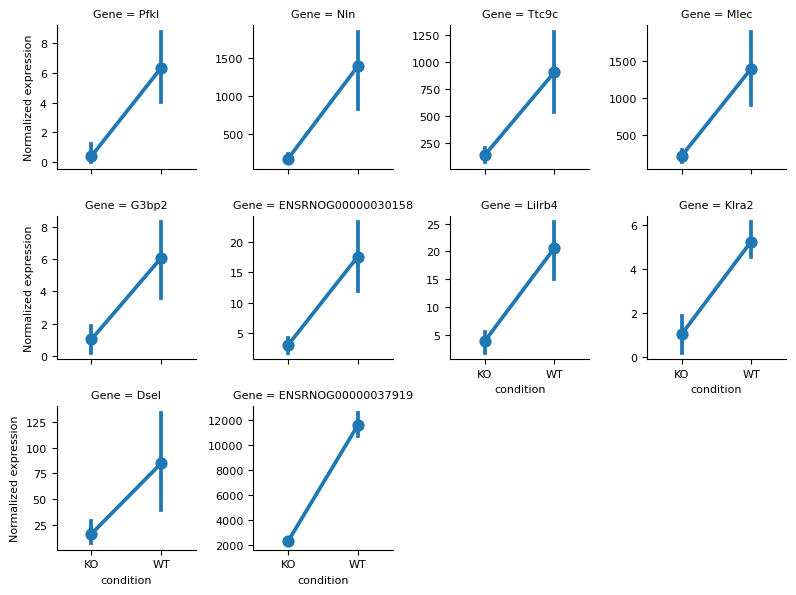

In [115]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False) # sharey=False
g.map_dataframe(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'])

The trends are much clearer now. We can also remove error bars and change color.

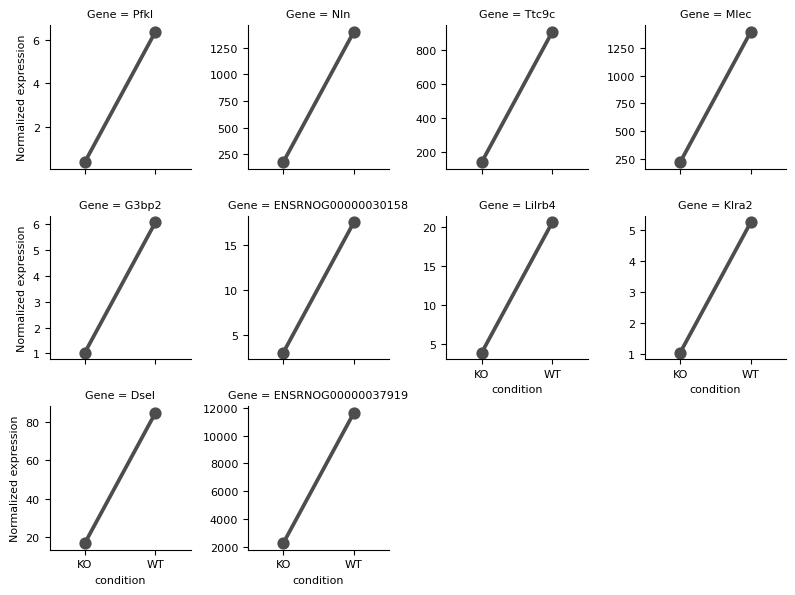

In [118]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)
# Note: color '.3' is shorthand for a dark grey. It is a different grey than "darkgrey"

Let's do the same for upregulated genes.

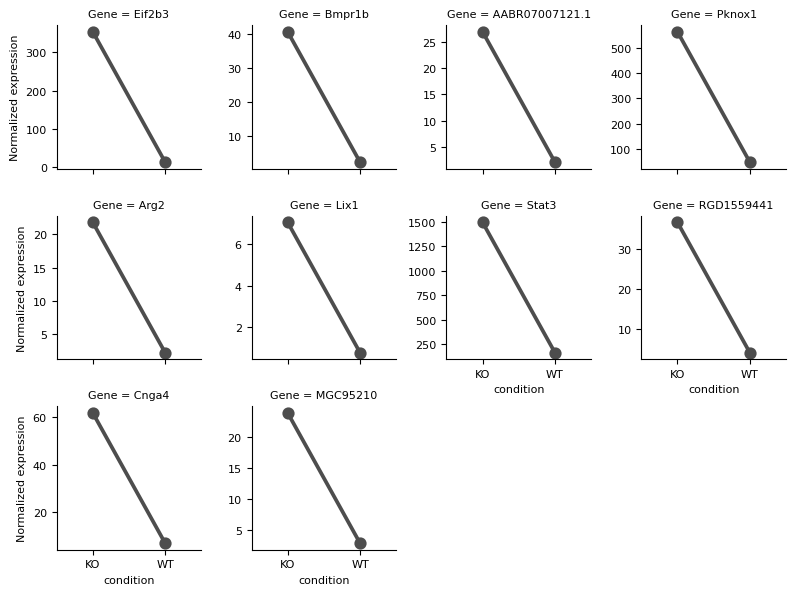

In [119]:
g = sns.FacetGrid(topUp, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)

The error bars are fine, but there are other ways of displaying the data. If you prefer visualizing expression for each replicate as an individual point, you can use `regplot` instead.

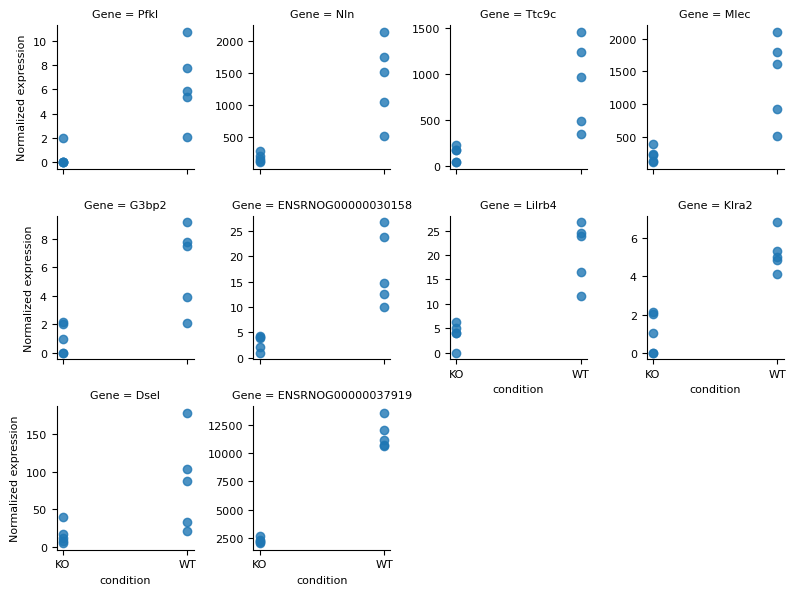

In [121]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.regplot, 'condition', 'Normalized expression', fit_reg=False) # fit_reg=False disables the regression line

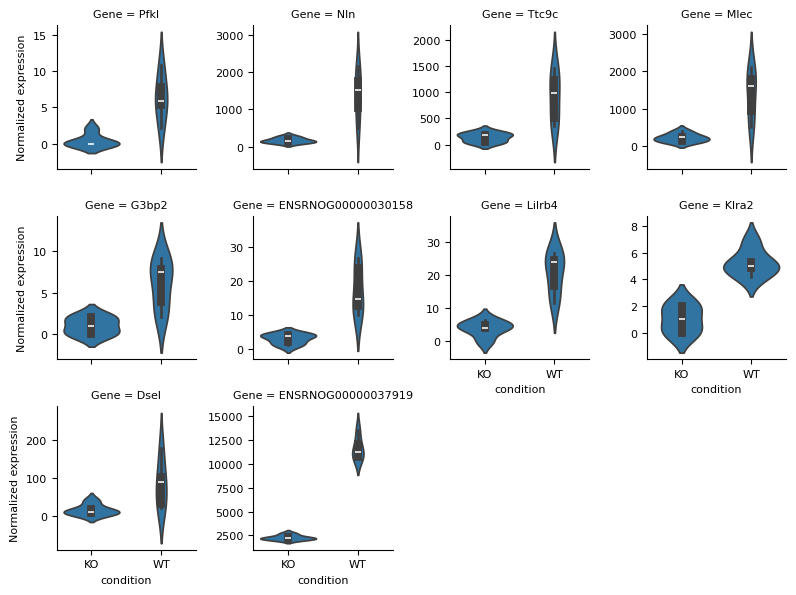

In [122]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.violinplot, 'condition', 'Normalized expression') 

You can use any of the different plots available in seaborn, depending on your needs. Here, though, let's stick with the pointplots and save them. First, the downregulated plot and then the upregulated.

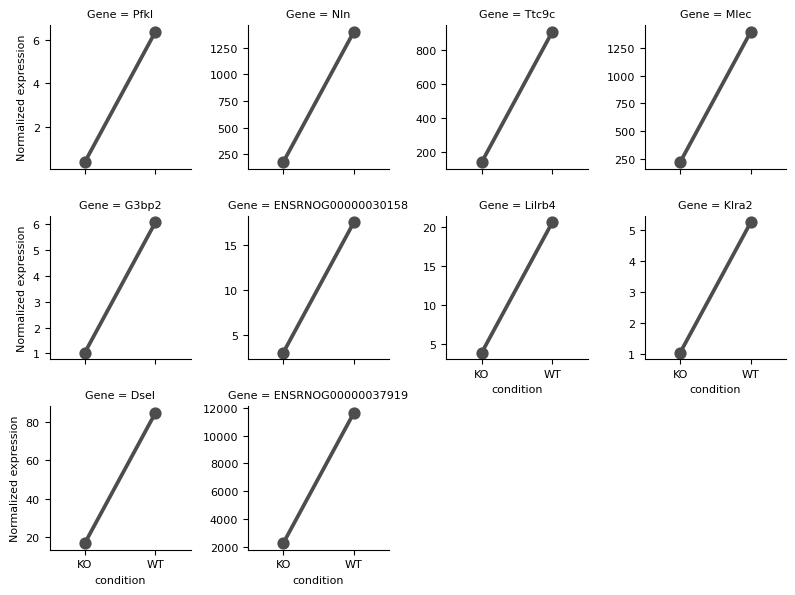

In [123]:
g = sns.FacetGrid(topDown, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)
g.savefig('gene_expression_downregulated.png')

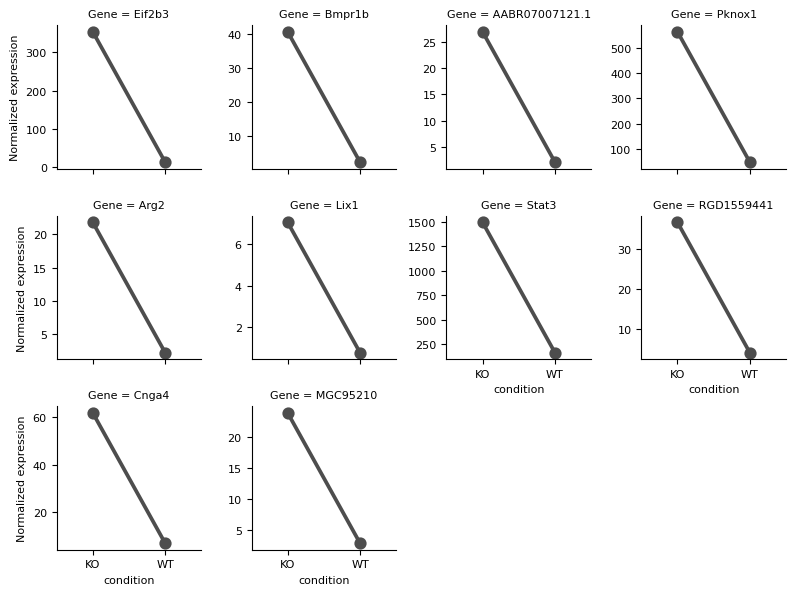

In [124]:
g = sns.FacetGrid(topUp, col="Gene", col_wrap=4, height=2, sharey=False)
g.map_dataframe(sns.pointplot, "condition", "Normalized expression", order=['KO', 'WT'], color=".3", errorbar=None)
g.savefig('gene_expression_upregulated.png')

Next up is plotting information from a gff3